## Load Library

In [306]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime
from tabulate import tabulate

import warnings
warnings.filterwarnings("ignore")

#set number to .2 decimal
pd.options.display.float_format = '{:,.2f}'.format

#set column preview to max 50 column
pd.set_option('display.max_columns', 50)

## Data Preprocessing

Dataset for this analysis is from https://www.kaggle.com/datasets/carrie1/ecommerce-data?resource=download

In [6]:
#load dataset
df = pd.read_csv('assets/data.csv', encoding='ISO-8859-1') #this dataset has some problem with default UTF-8 encoding

#see data information
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [384]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,"17,850.00",United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,"17,850.00",United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,"17,850.00",United Kingdom


### Handle Missing Value

In [383]:
print(df.isnull().sum())

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64


There are 135k row transaction with Null Customer ID. There are 2 ways to deal with this; impute or drop the null values. In this analysis, because we want to identify customer segment and there are no other consideration, we go with drop the null values

In [88]:
df_1 = df.dropna(subset='CustomerID')
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


There are no missing value after we drop row null value by CustomerID

### Changing Data Types

In [89]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    406829 non-null  object 
 1   StockCode    406829 non-null  object 
 2   Description  406829 non-null  object 
 3   Quantity     406829 non-null  int64  
 4   InvoiceDate  406829 non-null  object 
 5   UnitPrice    406829 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      406829 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 27.9+ MB


Changing data types:
* Invoice Date  : datetime
* CustomerID    : int

In [143]:
#changing invoice date into datetime type
df_1['InvoiceDate'] = pd.to_datetime(df_1['InvoiceDate'])

#changing CustomerID to object
df_1['CustomerID'] = df_1['CustomerID'].astype('int')

In [91]:
df_1.info()

<class 'pandas.core.frame.DataFrame'>
Index: 406829 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    406829 non-null  object        
 1   StockCode    406829 non-null  object        
 2   Description  406829 non-null  object        
 3   Quantity     406829 non-null  int64         
 4   InvoiceDate  406829 non-null  datetime64[ns]
 5   UnitPrice    406829 non-null  float64       
 6   CustomerID   406829 non-null  int64         
 7   Country      406829 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 27.9+ MB


### Handle Return Transaction

In [92]:
df_1.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID
count,"406,829.00",406829,"406,829.00","406,829.00"
mean,12.06,2011-07-10 16:30:57.879207424,3.46,"15,287.69"
min,"-80,995.00",2010-12-01 08:26:00,0.00,"12,346.00"
25%,2.00,2011-04-06 15:02:00,1.25,"13,953.00"
50%,5.00,2011-07-31 11:48:00,1.95,"15,152.00"
75%,12.00,2011-10-20 13:06:00,3.75,"16,791.00"
max,"80,995.00",2011-12-09 12:50:00,"38,970.00","18,287.00"
std,248.69,NaN,69.32,"1,713.60"


In [93]:
len_return = len(df_1[df_1['Quantity'] < 0])
len_data = len(df_1)
ratio_return = len_return/len_data * 100.0

print(f"Jumlah Return sebanyak {len_return} atau {round(ratio_return,2)}% dari total data")

Jumlah Return sebanyak 8905 atau 2.19% dari total data


In [94]:
#check return data
df_return = df_1[df_1['Quantity'] < 0]

print(df_return.InvoiceNo.str[:1].unique())

['C']


In [144]:
df_return['InvoiceNo_initial'] = df_return['InvoiceNo'].str[1:]

df_initial = df_1[df_1['InvoiceNo'].isin(list(df_return['InvoiceNo_initial'].unique()))]

print(len(df_return))
print(len(df_initial))

8905
0


Tidak ada initial transaction ditemukan pada data return, dikarenakan data return tidak terlalu berpengaruh pada data analysis kali ini, maka kita drop saja data returnnya

In [96]:
#drop data return
df_2 = df_1[
    df_1['Quantity'] >= 0
]

In [97]:
# Separate numeric and categorical columns
numeric_cols = df_2.select_dtypes(include=['number'])  # Select numeric columns
categorical_cols = df_2.select_dtypes(exclude=['number'])  # Select categorical columns

# Describe numeric columns
print("Numeric Columns Description:")
print(numeric_cols.describe())

# Describe categorical columns
print("\nCategorical Columns Description:")
print(categorical_cols.describe())

Numeric Columns Description:
        Quantity  UnitPrice  CustomerID
count 397,924.00 397,924.00  397,924.00
mean       13.02       3.12   15,294.32
std       180.42      22.10    1,713.17
min         1.00       0.00   12,346.00
25%         2.00       1.25   13,969.00
50%         6.00       1.95   15,159.00
75%        12.00       3.75   16,795.00
max    80,995.00   8,142.75   18,287.00

Categorical Columns Description:
                         InvoiceDate
count                         397924
mean   2011-07-10 23:43:36.912475648
min              2010-12-01 08:26:00
25%              2011-04-07 11:12:00
50%              2011-07-31 14:39:00
75%              2011-10-20 14:33:00
max              2011-12-09 12:50:00


### Handling Unit Price == 0

In [314]:
print(df_2[df_2['UnitPrice'] == 0].head())
print(f"Ada {len(df_2[df_2['UnitPrice'] == 0])} data yang unit pricenya 0")

      InvoiceNo StockCode                   Description  Quantity  \
9302     537197     22841  ROUND CAKE TIN VINTAGE GREEN         1   
33576    539263     22580  ADVENT CALENDAR GINGHAM SACK         4   
40089    539722     22423      REGENCY CAKESTAND 3 TIER        10   
47068    540372     22090       PAPER BUNTING RETROSPOT        24   
47070    540372     22553        PLASTERS IN TIN SKULLS        24   

              InvoiceDate  UnitPrice  CustomerID         Country  
9302  2010-12-05 14:02:00       0.00       12647         Germany  
33576 2010-12-16 14:36:00       0.00       16560  United Kingdom  
40089 2010-12-21 13:45:00       0.00       14911            EIRE  
47068 2011-01-06 16:41:00       0.00       13081  United Kingdom  
47070 2011-01-06 16:41:00       0.00       13081  United Kingdom  
Ada 40 data yang unit pricenya 0


In [315]:
#product yang nilai Unit Pricenya 0
df_2[df_2['UnitPrice'] == 0].groupby('Description').agg({'InvoiceNo':'count','Quantity':'sum'}).reset_index()

,Description,InvoiceNo,Quantity
0,OVAL WALL MIRROR DIAMANTE,1,1
1,36 FOIL STAR CAKE CASES,1,144
2,ADVENT CALENDAR GINGHAM SACK,1,4
3,ASSTD DESIGN 3D PAPER STICKERS,1,12540
4,BISCUIT TIN VINTAGE CHRISTMAS,1,216
5,CERAMIC BOWL WITH LOVE HEART DESIGN,1,36
6,CHILDREN'S APRON DOLLY GIRL,1,1
7,CHILDS BREAKFAST SET CIRCUS PARADE,1,1
8,CHRISTMAS PUDDING TRINKET POT,1,12
9,FAIRY CAKES NOTEBOOK A6 SIZE,1,16


In [316]:
#remove unit price 0
df_clean = df_2[df_2['UnitPrice'] > 0]

## Exploratory Data Analysis

In [317]:
print(f"Transactions from {df_clean['InvoiceDate'].dt.date.min()} to {df_clean['InvoiceDate'].dt.date.max()}")
print("="*100)
print(f"Total number of transactions: {len(df_clean)}")
print("="*100)
print(f"There are {df_clean['CustomerID'].nunique()} unique customers who shopped during this period")


Transactions from 2010-12-01 to 2011-12-09
Total number of transactions: 397884
There are 4338 unique customers who shopped during this period


### Feature Engineering

In [318]:
## add month_year
df_clean['MonthYear'] = df_clean['InvoiceDate'].dt.to_period('M')

## add time
df_clean['Time'] = df_clean['InvoiceDate'].dt.time

## add date
df_clean['TransactDate'] = df_clean['InvoiceDate'].dt.date

## extract hour transact
df_clean['HourTransact'] = df_clean['InvoiceDate'].dt.hour

## add transaction amount
df_clean['TransactAmount'] = df_clean['UnitPrice'] * df_clean['Quantity']

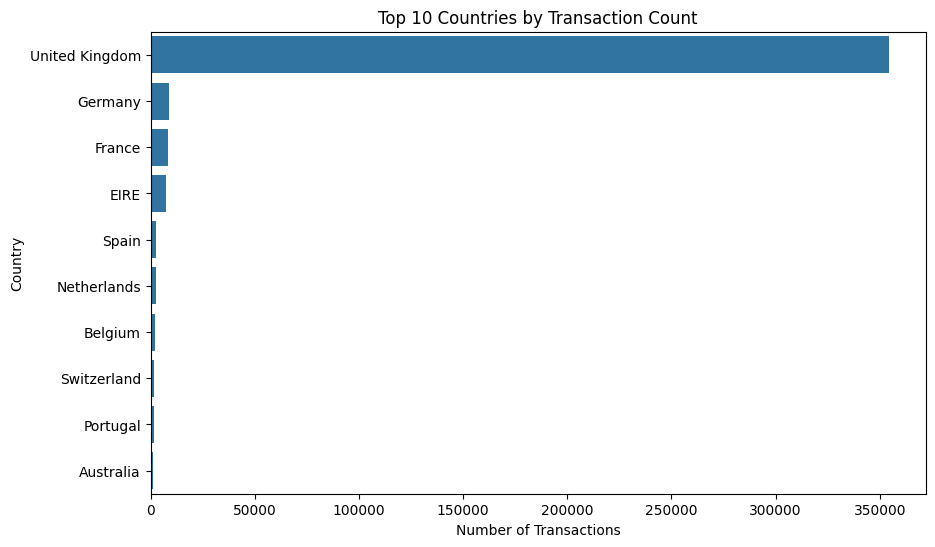

In [319]:
# Customer distribution by Country
plt.figure(figsize=(10, 6))
top_countries = df_clean['Country'].value_counts().head(10)  # Top 10 countries
sns.barplot(x=top_countries.values, y=top_countries.index)
plt.title("Top 10 Countries by Transaction Count")
plt.xlabel("Number of Transactions")
plt.ylabel("Country")
plt.show()

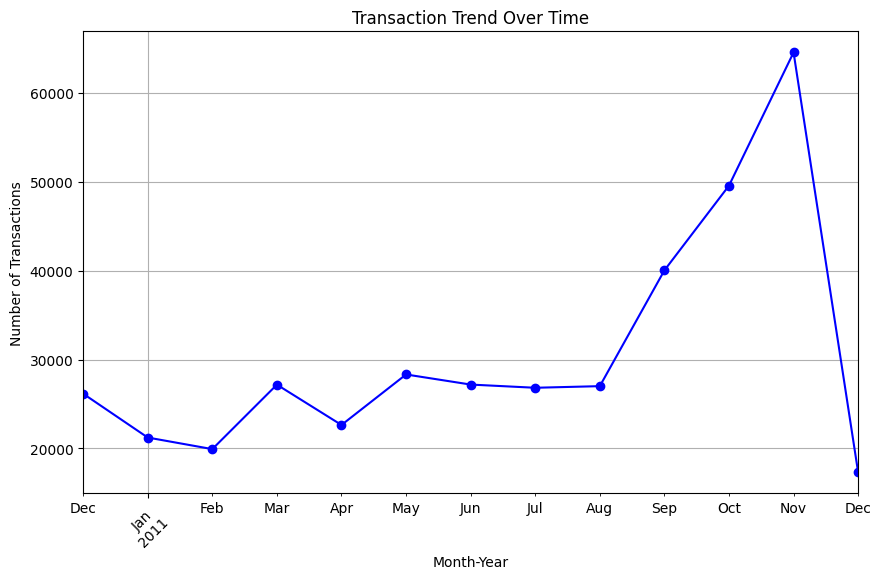

In [320]:
# Transaction Trend Over Time (month-year)
plt.figure(figsize=(10, 6))
monthly_sales = df_clean['MonthYear'].value_counts().sort_index()
monthly_sales.plot(kind='line', marker='o', color='b')
plt.title("Transaction Trend Over Time")
plt.xlabel("Month-Year")
plt.ylabel("Number of Transactions")
plt.xticks(rotation=45)
plt.grid()
plt.show()

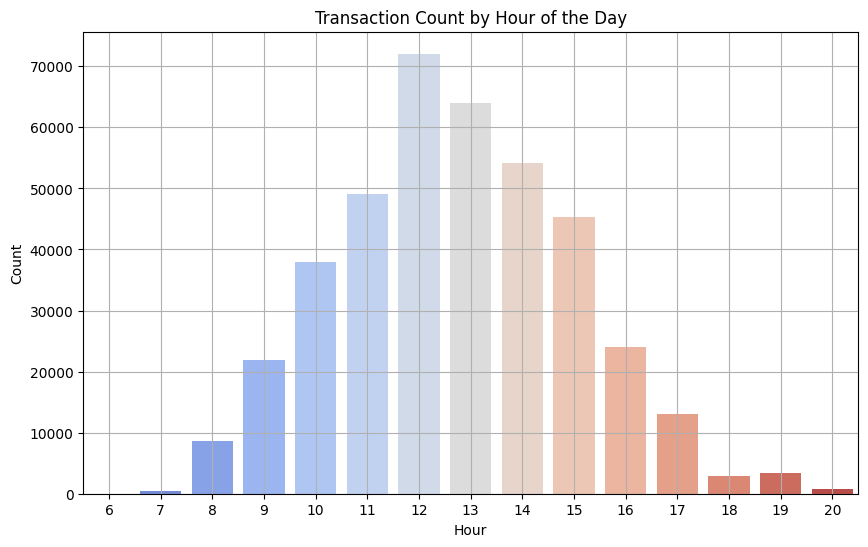

In [321]:
# Hourly transaction distribution
plt.figure(figsize=(10, 6))
sns.countplot(x='HourTransact', data=df_clean, palette='coolwarm')
plt.title("Transaction Count by Hour of the Day")
plt.xlabel("Hour")
plt.ylabel("Count")
plt.grid()
plt.show()

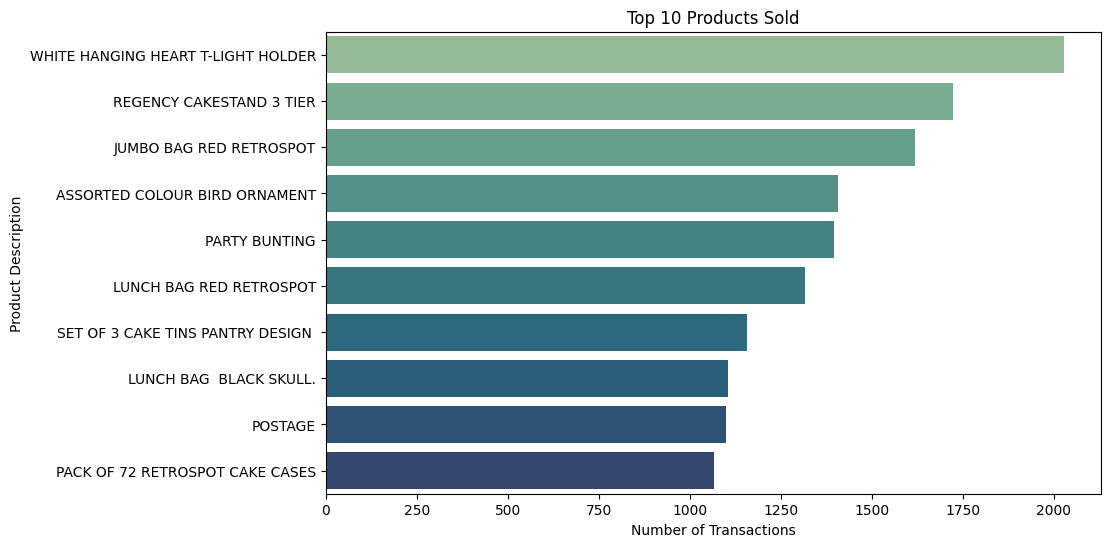

In [322]:
# Top Products Analysi
top_products = df_clean['Description'].value_counts().head(10)
plt.figure(figsize=(10, 6))
sns.barplot(y=top_products.index, x=top_products.values, palette="crest")
plt.title("Top 10 Products Sold")
plt.xlabel("Number of Transactions")
plt.ylabel("Product Description")
plt.show()

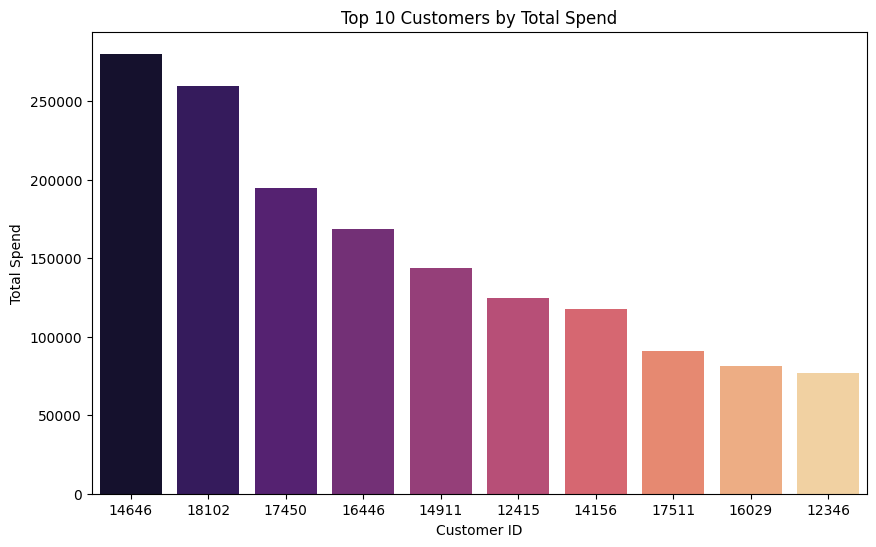

In [323]:
# Top 10 customers by total spend
top_customers = df_clean.groupby('CustomerID')['TransactAmount'].sum().sort_values(ascending=False).head(10)
plt.figure(figsize=(10, 6))
sns.barplot(x=top_customers.index.astype(str), y=top_customers.values, palette="magma")
plt.title("Top 10 Customers by Total Spend")
plt.xlabel("Customer ID")
plt.ylabel("Total Spend")
plt.show()

## RFM Analysis

Untuk RFM Analysis, kita menggunakan variabel sebagai berikut:
* Recency = Jumlah Hari dari terakhir kali customer berbelanja (initial date dari max transaction date)
* Frequency = Jumlah Customer berbelanja (dari jumlah Invoice Number)
* Monetary = Dari Average Transaction Value (Transaction Amount / Frequency)

In [324]:
#set initial_date to Measure Recency
initial_date = df_clean['TransactDate'].max()

#initiate table for RFM Analysis
df_rfm = df_clean.groupby(
    ['CustomerID']
).agg(
    {
        'InvoiceNo':'nunique', #Frequency = # of Unique InvoiceNo
        'TransactAmount':'sum',
        'TransactDate':lambda date: (initial_date - date.max()).days #Recency = # of Days since Last Trx
    }
).reset_index().rename({
    'InvoiceNo':'Frequency',
    'TransactAmount':'Amount',
    'TransactDate':'Recency'
}, axis=1)

df_rfm['Monetary'] = df_rfm['Amount']/df_rfm['Frequency'] #Monetary = Average Transaction Value (Amount/Frequency)

df_rfm.drop(columns=['Amount'], inplace=True)

df_rfm = df_rfm.set_index('CustomerID') #Set index = CustomerID

In [325]:
df_rfm.head()

,Frequency,Recency,Monetary
CustomerID,,,
12346,1,325,"77,183.60"
12347,7,2,615.71
12348,4,75,449.31
12349,1,18,"1,757.55"
12350,1,310,334.40


In [326]:
## Calculate recency score based on quantiles using 5 score
df_rfm["RecencyScore"] = pd.qcut(df_rfm['Recency'], 5, labels=[5, 4, 3, 2, 1])
    
## Calculate frequency score based on rank quantiles, assigning labels from 1 to 5 (1 being lowest)
df_rfm["FrequencyScore"] = pd.qcut(df_rfm["Frequency"].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

## Calculate Monetary score based on quantiles using 5 score
df_rfm["MonetaryScore"] = pd.qcut(df_rfm['Monetary'].rank(method="first"), 5, labels=[1, 2, 3, 4, 5])

## Calculate RFM Score
df_rfm['score'] = df_rfm['RecencyScore'].astype(str) + df_rfm['FrequencyScore'].astype(str) + df_rfm['MonetaryScore'].astype(str)

In [336]:
seg_map_rfm = {
    r'[5][4-5][4-5]': 'Champions',  # Customers who are recent, highly frequent, and high spenders
    
    # Loyal Customers: Recent, frequent, but moderate to low spenders
    r'[5][4-5][1-3]': 'Loyal Customers',  # Recent customers, frequent but lower spenders
    
    # Big Spender: Recent, low-to-moderate frequency, but high spenders
    r'[5][1-3][4-5]': 'Big Spender',  # Recent customers with low to moderate frequency but high spend
    
    # Potential Loyalists: Moderate recency and frequency, but high spenders
    r'[3-4][3-5][4-5]': 'Potential Loyalist',  # Moderately recent and frequent, but high spenders

    # Need to Spend More: Moderate recency and frequency with lower spend
    r'[3-4][3-5][1-3]': 'Needs to Spend More',  # Moderate recency and frequency with low-to-moderate spend

    # Loyalists at Risk: Low recency, but high frequency and moderate spend
    r'[1-2][4-5][1-5]': 'Loyalist at Risk',  # Low recency, high frequency, moderate spending behavior

    # Hibernating: Low recency, low frequency, and low spend
    r'[1-3][1-3][1-3]': 'Hibernating',  # Inactive customers with low recency, low frequency, and low spend

    # Hibernating Big Spenders: Low recency, low frequency, but high spenders
    r'[3][1-3][4-5]': 'Big Spender Hibernate',  # Inactive customers with high spend but low frequency and recency
    
    # New Customers: Recent but low frequency and low spend
    r'[4-5][1-3][1]': 'New Customers',  # Recently acquired customers with low frequency and low spend
    
    # Promising New Customers: Recent but low frequency and moderate spend
    r'[4-5][1-3][2-3]': 'Promising New Customers',  # New customers with moderate spend potential
    
    # Promising: Recent, low frequency but high spenders
    r'[4-5][1-2][4-5]': 'New Customer Big Spender',  # New customers showing potential with high spending
    
    # Lost Customers: Low recency and low frequency, but high spenders
    r'[1-2][1-3][4-5]': 'Lost Customer',  # Customers with high spend but very low recent activity and frequency
}

df_rfm['segment'] = df_rfm['score'].replace(seg_map_rfm, regex=True)


In [337]:
df_rfm['segment'].unique()

array(['Lost Customer', 'Champions', 'Loyalist at Risk',
       'New Customer Big Spender', 'Hibernating', 'Needs to Spend More',
       'Potential Loyalist', 'Big Spender Hibernate', 'Big Spender',
       'Loyal Customers', 'Promising New Customers', 'New Customers'],
      dtype=object)

## RFM Analysis

Now that we have segments for each RFM Score, we want to deep analysis to know our customer segments

In [382]:
#see detail distribution each segment
df_rfm[['segment','Frequency','Recency','Monetary']].groupby(
    ['segment']
).mean()

,Frequency,Recency,Monetary
segment,,,
Big Spender,1.96,6.54,"1,509.54"
Big Spender Hibernate,1.20,53.13,664.46
Champions,13.99,5.25,659.13
Hibernating,1.35,184.71,188.62
Lost Customer,1.45,185.16,886.49
Loyal Customers,10.99,5.47,222.53
Loyalist at Risk,4.87,134.77,324.13
Needs to Spend More,4.82,33.71,215.00
New Customer Big Spender,1.23,24.03,633.37


In [379]:
##let's see each segment make up the sales
df_rfm_1 = df_rfm.reset_index()

#merge dataset with rfm segment
df_clean_rfm = df_clean.merge(
    df_rfm_1, on=['CustomerID'], how='left'
)

#aggregate metrics for each segment
df_group_rfm = df_clean_rfm.groupby(
    ['segment']
).agg(
    {
        'TransactAmount':'sum',
        'Quantity':'sum',
        'InvoiceNo':'nunique',
        'CustomerID':'nunique'
    }
).reset_index().rename(
    {
        'TransactAmount':'TotalSales',
        'Quantity':'TotalQuantity',
        'InvoiceNo':'TotalTransaction',
        'CustomerID':'TotalCustomer'
    },
    axis=1
)


df_group_rfm['SalesPercentage'] = df_group_rfm['TotalSales'] / df_group_rfm['TotalSales'].sum() * 100
df_group_rfm['QuantityPercentage'] = df_group_rfm['TotalQuantity'] / df_group_rfm['TotalQuantity'].sum() * 100
df_group_rfm['TransactionPercentage'] = df_group_rfm['TotalTransaction'] / df_group_rfm['TotalTransaction'].sum() * 100
df_group_rfm['CustomerPercentage'] = df_group_rfm['TotalCustomer'] / df_group_rfm['TotalCustomer'].sum() * 100
df_group_rfm['TotalQuantity'] = df_group_rfm['TotalQuantity'].astype(float)
df_group_rfm['TotalTransaction'] = df_group_rfm['TotalTransaction'].astype(float)
df_group_rfm['TotalCustomer'] = df_group_rfm['TotalCustomer'].astype(float)


In [381]:
df_group_rfm[['segment','TotalSales','TotalQuantity','TotalTransaction','TotalCustomer']].sort_values('TotalSales', ascending=False)

,segment,TotalSales,TotalQuantity,TotalTransaction,TotalCustomer
2,Champions,"3,540,108.41","1,973,949.00","4,210.00",301.00
10,Potential Loyalist,"1,924,206.22","1,111,012.00","2,891.00",504.00
5,Loyal Customers,"800,964.75","490,644.00","3,648.00",332.00
7,Needs to Spend More,"726,067.48","446,071.00","3,252.00",674.00
4,Lost Customer,"645,386.62","378,936.00",727.00,502.00
6,Loyalist at Risk,"449,925.76","280,318.00","1,379.00",283.00
3,Hibernating,"289,805.61","182,705.00","1,528.00","1,136.00"
0,Big Spender,"269,023.39","143,778.00",176.00,90.00
1,Big Spender Hibernate,"123,648.26","73,192.00",189.00,158.00
11,Promising New Customers,"71,465.12","44,877.00",301.00,188.00


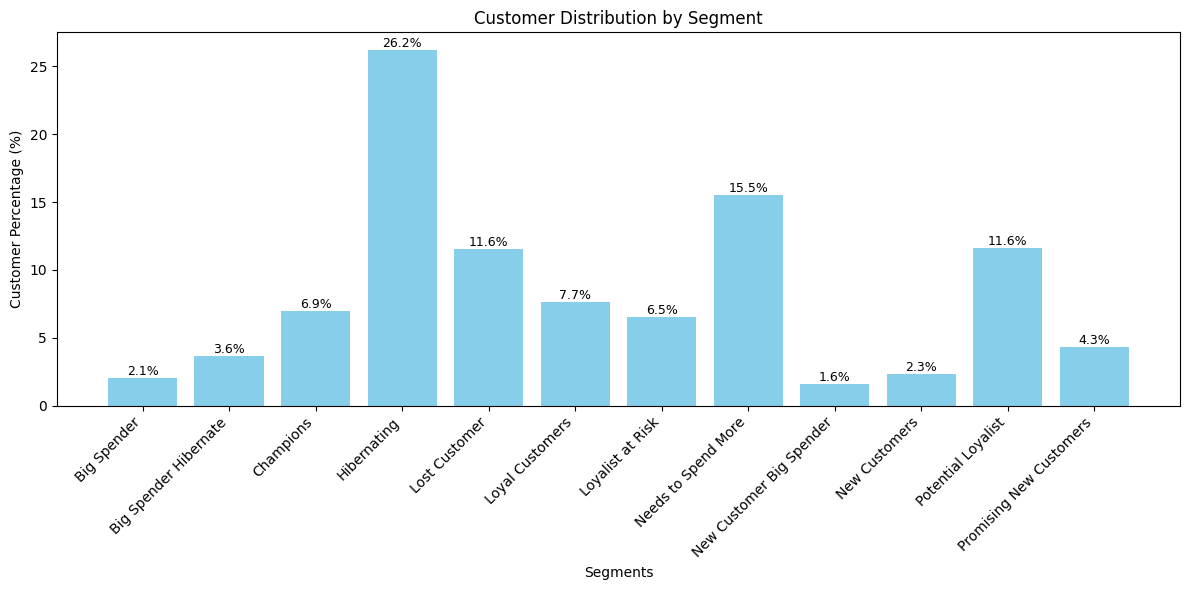

In [370]:
# Plotting Customer Distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(df_group_rfm["segment"], df_group_rfm["CustomerPercentage"], color="skyblue")

# Add data labels
for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(), 
             f"{bar.get_height():.1f}%", ha="center", va="bottom", fontsize=9)
             
plt.title("Customer Distribution by Segment")
plt.xlabel("Segments")
plt.ylabel("Customer Percentage (%)")
plt.xticks(rotation=45, ha="right", ticks=range(len(df_group_rfm['segment'])), labels=df_group_rfm['segment'])
plt.tight_layout()
plt.show()



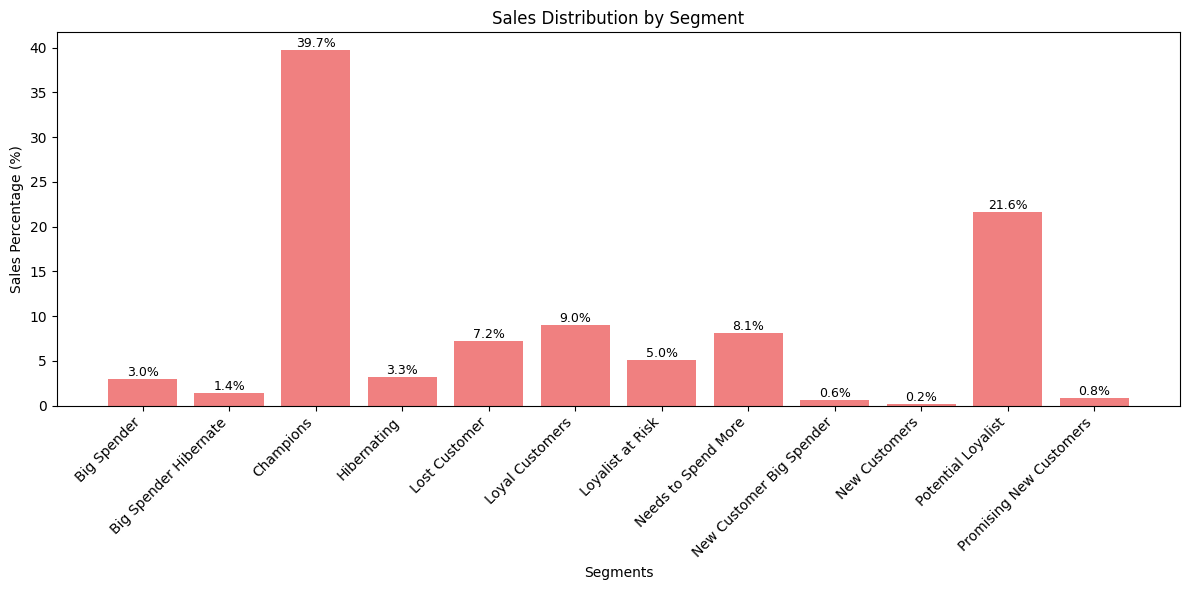

In [373]:
# Plotting Sales Distribution
plt.figure(figsize=(12, 6))
bars = plt.bar(df_group_rfm["segment"], df_group_rfm["SalesPercentage"], color="lightcoral")

for bar in bars:
    plt.text(bar.get_x() + bar.get_width() / 2, bar.get_height(),
             f"{bar.get_height():.1f}%", ha="center", va="bottom", fontsize=9)

plt.title("Sales Distribution by Segment")
plt.xlabel("Segments")
plt.ylabel("Sales Percentage (%)")
plt.xticks(rotation=45, ha="right")
plt.tight_layout()
plt.show()